<a href="https://colab.research.google.com/github/iamfaham/handwritten-digit-recognition-cv/blob/main/handwritten_digit_recognition_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project, we are using MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load and split the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255) to 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Now we will build the model. For this project we are using tensorflow.

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),         # Flatten 28x28 image to 1D
    tf.keras.layers.Dense(128, activation='relu'),         # Hidden layer
    tf.keras.layers.Dropout(0.2),                          # Prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')        # Output layer (10 digits)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# model.fit(x_train, y_train, epochs=5)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9806 - loss: 0.0622 - val_accuracy: 0.9768 - val_loss: 0.0756
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9811 - loss: 0.0568 - val_accuracy: 0.9777 - val_loss: 0.0711
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9833 - loss: 0.0494 - val_accuracy: 0.9775 - val_loss: 0.0757
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9853 - loss: 0.0448 - val_accuracy: 0.9783 - val_loss: 0.0748
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9870 - loss: 0.0404 - val_accuracy: 0.9781 - val_loss: 0.0787
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9880 - loss: 0.0371 - val_accuracy: 0.9806 - val_loss: 0.0708
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9879 - loss: 0.0354 - val_accuracy: 0.9792 - val_loss: 0.0785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.032

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0877
Test Accuracy: 0.98089998960495


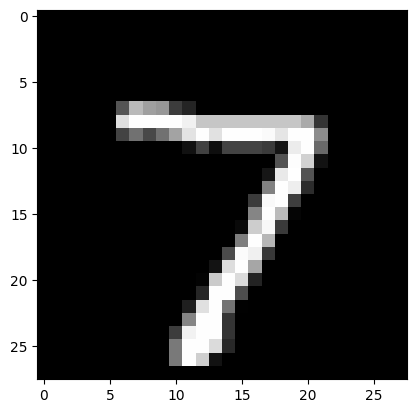

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Digit: 7


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a test image
index = 0
image = x_test[index]
plt.imshow(image, cmap='gray')
plt.show()

# Predict
prediction = model.predict(np.array([image]))
print("Predicted Digit:", np.argmax(prediction))


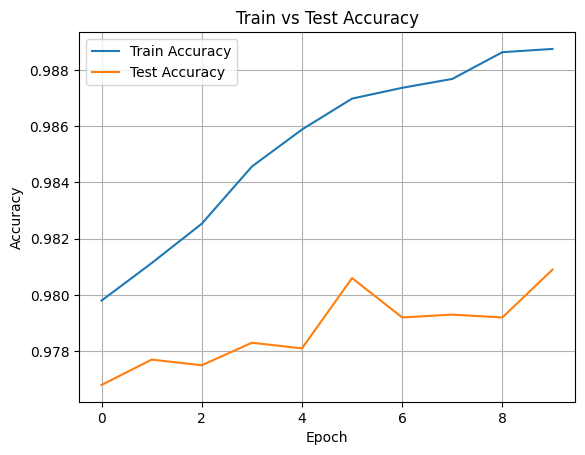

In [10]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
